# Linear Regression with scikit-learn

In this notebook, we'll explore linear regression using scikit-learn. We'll cover both single-variable (simple) and multivariable (multiple) linear regression, including data generation, model fitting, evaluation, and visualization.

## 1. Setup and Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression

# Set plotting style\ sns.set(style="whitegrid")

## 2. Single-Variable (Simple) Linear Regression

**2.1 Generate Synthetic Data**

In [2]:
# Generate a linear relationship y = 2x + noise
theta0 = 1.5  # intercept
theta1 = 2.0  # slope
n_samples = 100
np.random.seed(42)
X_single = 2 * np.random.rand(n_samples, 1)
y_single = theta0 + theta1 * X_single.flatten() + np.random.randn(n_samples) * 0.5

# Convert to DataFrame for convenience
df_single = pd.DataFrame({"x": X_single.flatten(), "y": y_single})
df_single.head()

,x,y
0,0.749080,3.041684
1,1.901429,5.153354
2,1.463988,4.473856
3,1.197317,2.900849
4,0.312037,2.014239


**2.2 Visualize Data**

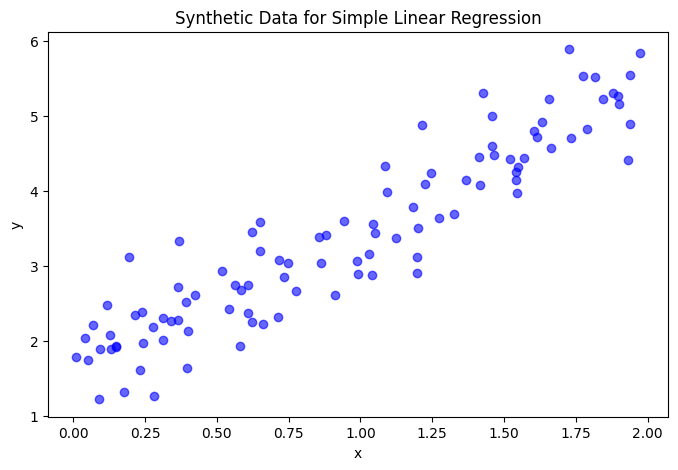

In [3]:
plt.figure(figsize=(8, 5))
plt.scatter(df_single['x'], df_single['y'], color='blue', alpha=0.6)
plt.title('Synthetic Data for Simple Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**2.3 Fit the Model**

In [4]:
# Initialize and fit the linear regression model
model_simple = LinearRegression()
model_simple.fit(X_single, y_single)

# Extract parameters
intercept_simple = model_simple.intercept_
slope_simple = model_simple.coef_[0]
print(f"Fitted intercept: {intercept_simple:.3f}")
print(f"Fitted slope: {slope_simple:.3f}")

Fitted intercept: 1.608
Fitted slope: 1.885


**2.4 Plot Regression Line**

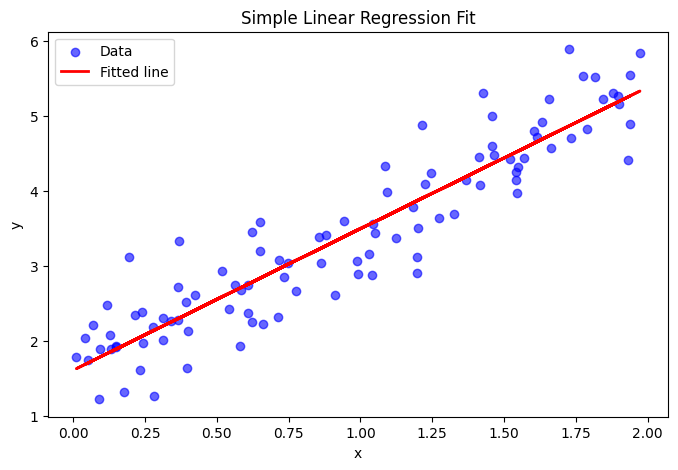

In [5]:
# Generate predictions for plotting
y_pred_line = model_simple.predict(X_single)

plt.figure(figsize=(8, 5))
plt.scatter(X_single, y_single, color='blue', alpha=0.6, label='Data')
plt.plot(X_single, y_pred_line, color='red', linewidth=2, label='Fitted line')
plt.title('Simple Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**2.5 Model Evaluation**

In [6]:
mse_simple = mean_squared_error(y_single, y_pred_line)
r2_simple = r2_score(y_single, y_pred_line)
print(f"Mean Squared Error: {mse_simple:.3f}")
print(f"R^2 Score: {r2_simple:.3f}")

Mean Squared Error: 0.202
R^2 Score: 0.861


## 3. Multivariable (Multiple) Linear Regression

**3.1 Generate Synthetic Data**

In [7]:
# Create a dataset with 3 features
d X_multi, y_multi, coef_true = make_regression(
    n_samples=200,
    n_features=3,
    noise=10.0,
    coef=True,
    random_state=42
)

# Create DataFrame
feature_names = [f"x{i+1}" for i in range(X_multi.shape[1])]
df_multi = pd.DataFrame(X_multi, columns=feature_names)
df_multi['y'] = y_multi

df_multi.head()

SyntaxError: invalid syntax (<ipython-input-7-8d26afd40a20>, line 2)

**3.2 Explore Feature Relationships**

In [ ]:
sns.pairplot(df_multi.sample(100), x_vars=feature_names, y_vars='y', height=3)
plt.suptitle('Pairplot of Features vs. Target', y=1.02)
plt.show()

**3.3 Split into Train and Test Sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_multi[feature_names], df_multi['y'], test_size=0.2, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

**3.4 Fit the Multiple Linear Regression Model**

In [ ]:
model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

# Extract coefficients
intercept_multi = model_multi.intercept_
coef_multi = model_multi.coef_
print(f"Fitted intercept: {intercept_multi:.3f}")
for name, coef in zip(feature_names, coef_multi):
    print(f"Coefficient for {name}: {coef:.3f}")

**3.5 Evaluate on Test Set**

In [ ]:
# Predict
y_pred_multi = model_multi.predict(X_test)

# Metrics
mse_multi = mean_squared_error(y_test, y_pred_multi)
r2_multi = r2_score(y_test, y_pred_multi)
print(f"Test Mean Squared Error: {mse_multi:.3f}")
print(f"Test R^2 Score: {r2_multi:.3f}")

**3.6 Residual Plot**

In [ ]:
residuals = y_test - y_pred_multi
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_multi, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

## 4. Conclusion

In this notebook, we covered:
- Generating synthetic data for regression tasks
- Fitting and visualizing simple linear regression models
- Evaluating model performance using MSE and R²
- Extending to multiple features with multiple linear regression
- Examining model coefficients and residuals

Next steps could include exploring regularized linear models (Ridge, Lasso), polynomial regression, and cross-validation techniques.